In [127]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

liar_data = pd.read_csv('valid.tsv', sep='\t', header=None)
liar_data.columns = [
    'ID', 'Label', 'Statement', 'Subject', 'Speaker', 
    'Job Title', 'State', 'Party', 'Pants on Fire', 
    'False', 'Barely True', 'Half True', 'Mostly True', 
    'Source'
]

# Load Sentiment140 dataset for sentiment analysis
sentiment_data = pd.read_csv('sentiment140_dataset.csv', encoding='latin1', header=None)
sentiment_data.columns = ['Polarity', 'ID', 'Date', 'Query', 'User', 'Text']

# Preprocessing LIAR dataset
liar_data = liar_data[['Label', 'Statement']]
liar_data = liar_data[liar_data['Label'].notnull()]

# Preprocessing Sentiment140 dataset
sentiment_data = sentiment_data[['Polarity', 'Text']]
sentiment_data['Polarity'] = sentiment_data['Polarity'].map({0: 'Negative', 4: 'Positive'})

# Analyze misinformation patterns
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(liar_data['Statement'])
y = liar_data['Label']

# Train-test split for misinformation detection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = nb_model.predict(X_test)
print("Accuracy for Misinformation Detection:", accuracy_score(y_test, y_pred))
print("Classification Report for Misinformation Detection:\n", classification_report(y_test, y_pred))

# Sentiment analysis using Sentiment140
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return 'Positive' if sentiment_score['compound'] > 0 else 'Negative'

sentiment_data['Sentiment'] = sentiment_data['Text'].apply(analyze_sentiment)

# Analyze sentiments in LIAR dataset
liar_data['Sentiment'] = liar_data['Statement'].apply(analyze_sentiment)

# Virality analysis: average word count by misinformation label
liar_data['Word Count'] = liar_data['Statement'].apply(lambda x: len(x.split()))
virality_analysis = liar_data.groupby('Label')['Word Count'].mean()

print("Virality Analysis:\n", virality_analysis)

# Save processed datasets for further analysis
liar_data.to_csv('liar_sentiment_analysis.csv', index=False)
sentiment_data.to_csv('sentiment140_analysis.csv', index=False)

print("Analysis completed. Results saved to 'liar_sentiment_analysis.csv' and 'sentiment140_analysis.csv'.")


Accuracy for Misinformation Detection: 0.25680933852140075
Classification Report for Misinformation Detection:
               precision    recall  f1-score   support

 barely-true       0.21      0.18      0.20        49
       false       0.32      0.43      0.37        51
   half-true       0.26      0.24      0.25        59
 mostly-true       0.32      0.40      0.36        47
  pants-fire       0.00      0.00      0.00        27
        true       0.08      0.08      0.08        24

    accuracy                           0.26       257
   macro avg       0.20      0.22      0.21       257
weighted avg       0.23      0.26      0.24       257

Virality Analysis:
 Label
barely-true    18.181435
false          16.433460
half-true      19.451613
mostly-true    18.454183
pants-fire     17.112069
true           17.420118
Name: Word Count, dtype: float64
Analysis completed. Results saved to 'liar_sentiment_analysis.csv' and 'sentiment140_analysis.csv'.


In [154]:
liar_data = pd.read_csv('liar_sentiment_analysis.csv')
sentiment_data = pd.read_csv('sentiment140_analysis.csv')

# Ensure columns are loaded correctly
print("LIAR Dataset Columns:", liar_data.columns)
print("Sentiment140 Dataset Columns:", sentiment_data.columns)

LIAR Dataset Columns: Index(['Label', 'Statement', 'Sentiment', 'Word Count'], dtype='object')
Sentiment140 Dataset Columns: Index(['Polarity', 'Text', 'Sentiment'], dtype='object')


LIAR Dataset Columns: Index(['Label', 'Statement', 'Sentiment', 'Word Count'], dtype='object')
Sentiment140 Dataset Columns: Index(['Polarity', 'Text', 'Sentiment'], dtype='object')
LIAR Dataset Sentiment Distribution by Label:
 Sentiment    Negative  Positive
Label                          
barely-true  0.696203  0.303797
false        0.615970  0.384030
half-true    0.689516  0.310484
mostly-true  0.661355  0.338645
pants-fire   0.672414  0.327586
true         0.597633  0.402367


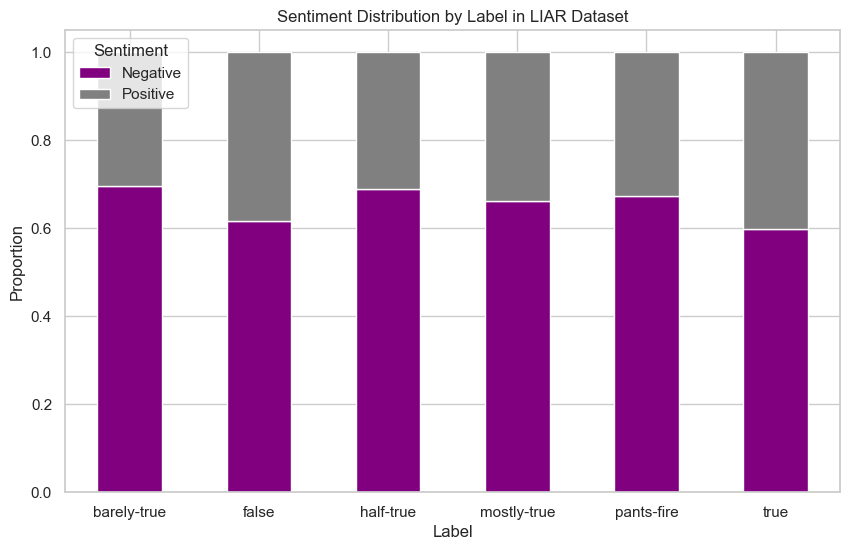

Average Word Count by Sentiment in LIAR Dataset:
 Sentiment
Negative    17.072361
Positive    19.555556
Name: Word Count, dtype: float64


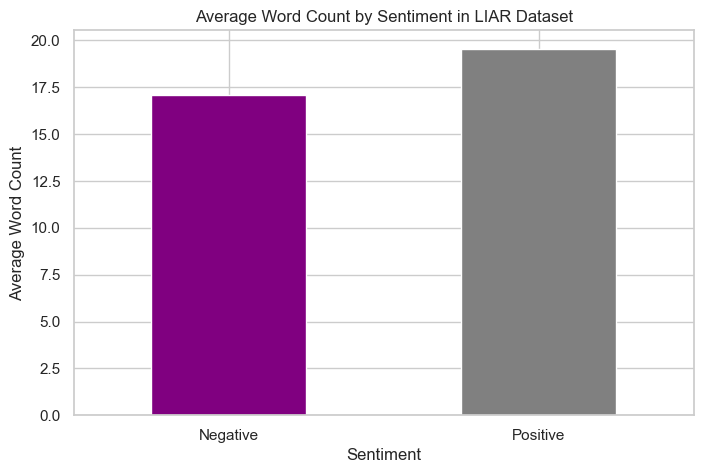

Average Word Count by Label in LIAR Dataset:
 Label
barely-true    18.181435
false          16.433460
half-true      19.451613
mostly-true    18.454183
pants-fire     17.112069
true           17.420118
Name: Word Count, dtype: float64


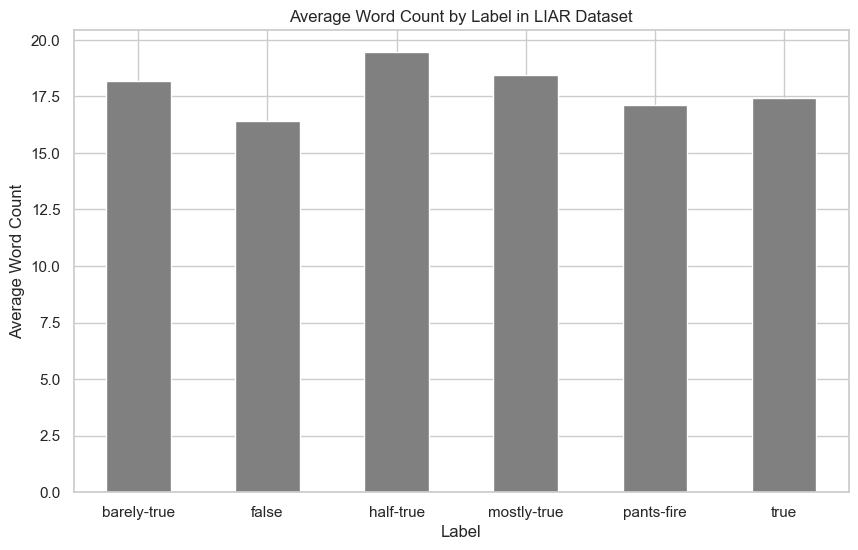

Polarity Distribution in Sentiment140 Dataset:
 Polarity
Negative    0.5
Positive    0.5
Name: proportion, dtype: float64


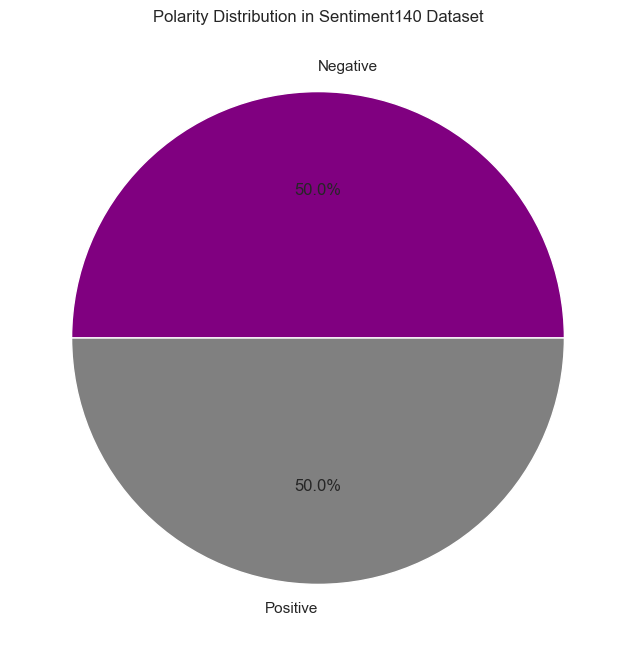

Average Text Length by Polarity:
 Polarity
Negative    74.301790
Positive    73.878433
Name: Text Length, dtype: float64


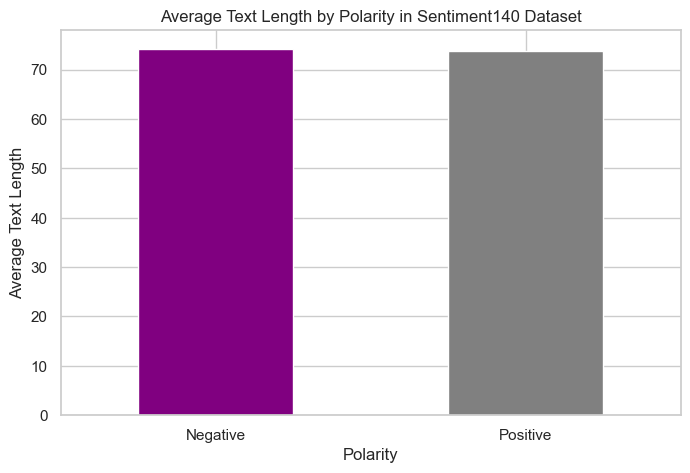

In [158]:
# Load the processed datasets
liar_data = pd.read_csv('liar_sentiment_analysis.csv')
sentiment_data = pd.read_csv('sentiment140_analysis.csv')

# Ensure columns are loaded correctly
print("LIAR Dataset Columns:", liar_data.columns)
print("Sentiment140 Dataset Columns:", sentiment_data.columns)

# ----- Analysis and Visualization -----

# 1. Sentiment distribution by Label (LIAR Dataset)
liar_sentiment_summary = liar_data.groupby('Label')['Sentiment'].value_counts(normalize=True).unstack()
print("LIAR Dataset Sentiment Distribution by Label:\n", liar_sentiment_summary)

# Visualization
liar_sentiment_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['purple', 'grey'])
plt.title('Sentiment Distribution by Label in LIAR Dataset')
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.show()

# 2. Average Word Count by Sentiment (LIAR Dataset)
avg_word_count_by_sentiment = liar_data.groupby('Sentiment')['Word Count'].mean()
print("Average Word Count by Sentiment in LIAR Dataset:\n", avg_word_count_by_sentiment)

# Visualization
avg_word_count_by_sentiment.plot(kind='bar', figsize=(8, 5), color=['purple', 'gray'])
plt.title('Average Word Count by Sentiment in LIAR Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.show()

# 3. Average Word Count by Label (LIAR Dataset)
avg_word_count_by_label = liar_data.groupby('Label')['Word Count'].mean()
print("Average Word Count by Label in LIAR Dataset:\n", avg_word_count_by_label)

# Visualization
avg_word_count_by_label.plot(kind='bar', figsize=(10, 6), color='grey')
plt.title('Average Word Count by Label in LIAR Dataset')
plt.xlabel('Label')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.show()

# 4. Polarity Distribution (Sentiment140 Dataset)
polarity_distribution = sentiment_data['Polarity'].value_counts(normalize=True)
print("Polarity Distribution in Sentiment140 Dataset:\n", polarity_distribution)

# Visualization
polarity_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['purple', 'gray'], labels=['Negative', 'Positive'])
plt.title('Polarity Distribution in Sentiment140 Dataset')
plt.ylabel('')
plt.show()

# 5. Average Text Length by Polarity (Sentiment140 Dataset)
sentiment_data['Text Length'] = sentiment_data['Text'].apply(len)
avg_text_length_by_polarity = sentiment_data.groupby('Polarity')['Text Length'].mean()
print("Average Text Length by Polarity:\n", avg_text_length_by_polarity)

# Visualization
avg_text_length_by_polarity.plot(kind='bar', figsize=(8, 5), color=['purple', 'gray'])
plt.title('Average Text Length by Polarity in Sentiment140 Dataset')
plt.xlabel('Polarity')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.show()


Topic 1:
says sen state budget 10 percent african american federal government illegal immigrants rick perry years ago says texas new jersey
Topic 2:
500 million 40 percent ted cruz million jobs illegal immigrants billion year says new wall street mitt romney social security
Topic 3:
says hillary clinton says hillary health care reform care reform health care plan care plan 000 year obama administration hillary clinton health care
Topic 4:
new york income tax president obama says donald trump says donald gov scott walker gov scott scott walker donald trump united states
Topic 5:
says president president barack obamas president barack obama supreme court barack obamas health care law care law health care president barack barack obama
Average Sentiment Score by Topic:
 Topic
0   -0.061428
1   -0.013832
2    0.117925
3   -0.037349
4    0.003790
Name: Sentiment Score, dtype: float64


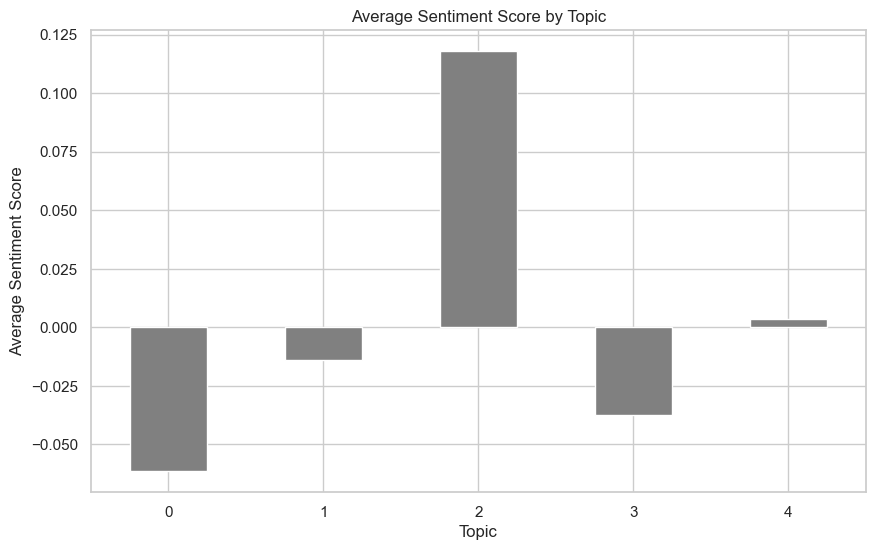

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring on LIAR dataset
liar_data['Sentiment Score'] = liar_data['Statement'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 使用 bi-grams 和 tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_features=1000)
X_ngrams = vectorizer.fit_transform(liar_data['Statement'])

# 重新进行主题建模
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_ngrams)

# 查看每个主题的关键词
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print(" ".join([terms[j] for j in topic.argsort()[-10:]]))

# 为每个声明分配主题
liar_data['Topic'] = lda.transform(vectorizer.transform(liar_data['Statement'])).argmax(axis=1)

# 分析每个主题的情绪得分分布
avg_sentiment_by_topic = liar_data.groupby('Topic')['Sentiment Score'].mean()
print("Average Sentiment Score by Topic:\n", avg_sentiment_by_topic)

# 可视化
avg_sentiment_by_topic.plot(kind='bar', figsize=(10, 6), color='gray')
plt.title('Average Sentiment Score by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.show()


Sentiment Distribution by Topic:
 Sentiment Category  Negative   Neutral  Positive
Topic                                           
0                   0.368209  0.352113  0.279678
1                   0.347826  0.358696  0.293478
2                   0.270142  0.203791  0.526066
3                   0.390863  0.294416  0.314721
4                   0.317949  0.343590  0.338462


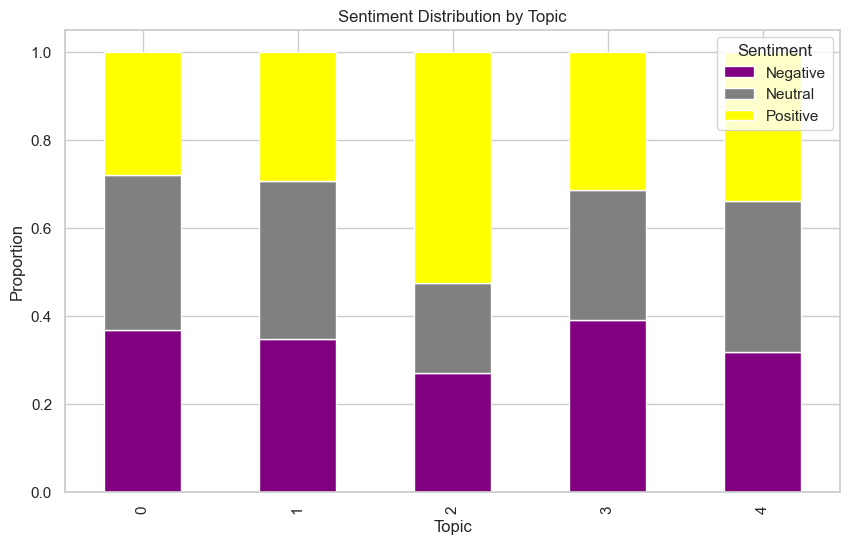

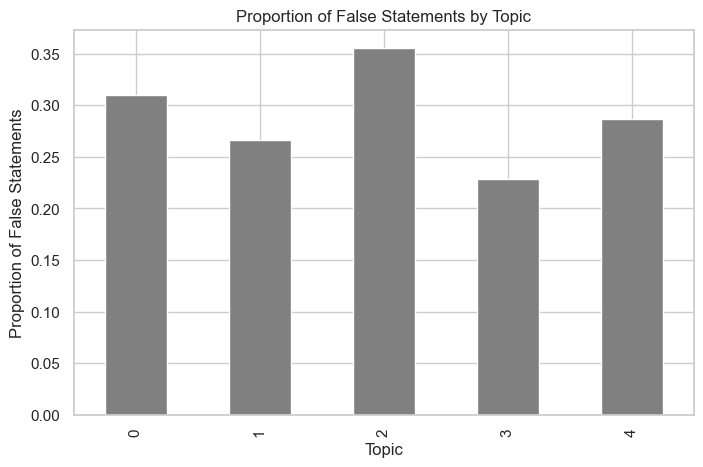

Average Sentiment by Label and Topic:
 Label  barely-true     false  half-true  mostly-true  pants-fire      true
Topic                                                                     
0        -0.105341 -0.009309  -0.112420    -0.087710   -0.033015 -0.006282
1        -0.053579 -0.061160  -0.019118     0.095550   -0.071611 -0.044214
2        -0.043433  0.256123   0.044658     0.204716    0.079709  0.134232
3         0.002600 -0.053663  -0.060684    -0.115789   -0.238569  0.162533
4         0.079205  0.085645  -0.067900    -0.020480   -0.170170  0.063705


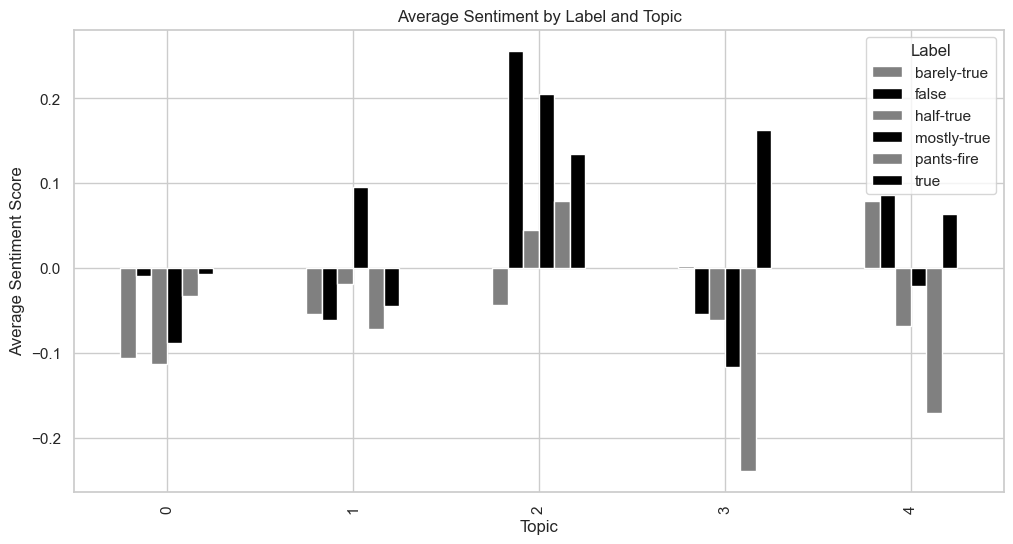

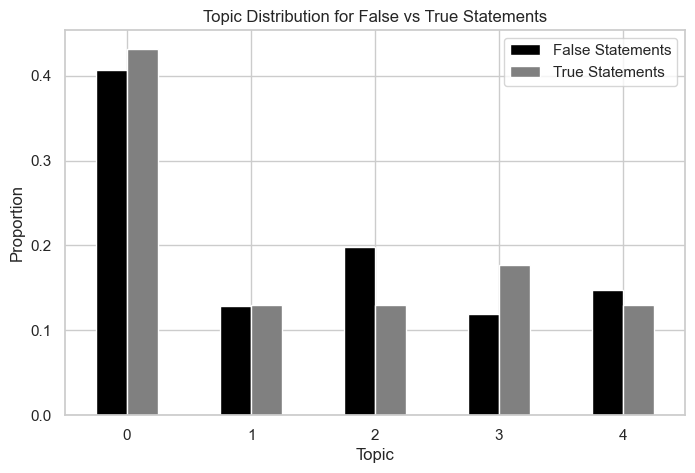

Average Text Length by Sentiment Category:
 Sentiment Category
Negative    112.327314
Neutral      89.853301
Positive    116.916667
Name: Text Length, dtype: float64


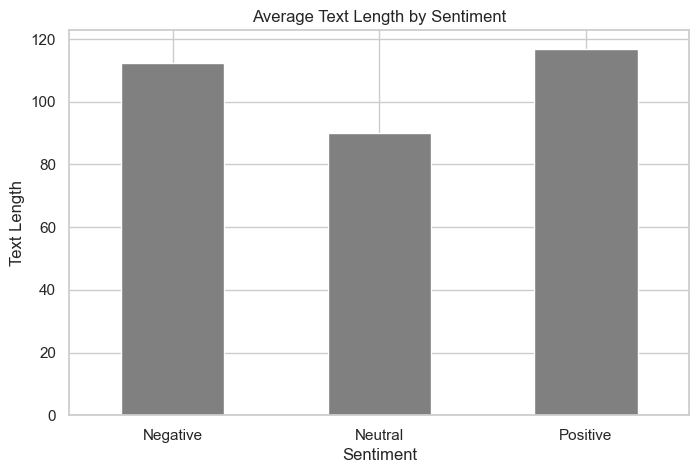

In [167]:
# 分类情绪为 Positive, Neutral, Negative
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

liar_data['Sentiment Category'] = liar_data['Sentiment Score'].apply(classify_sentiment)

# 每个主题的情绪分布
sentiment_by_topic = liar_data.groupby('Topic')['Sentiment Category'].value_counts(normalize=True).unstack()
print("Sentiment Distribution by Topic:\n", sentiment_by_topic)

# 可视化
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(10, 6), color=['purple', 'grey', 'yellow'])
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

# 按主题和虚假声明统计
false_statements_by_topic = liar_data[liar_data['Label'].isin(['false', 'pants-fire'])].groupby('Topic').size()
total_statements_by_topic = liar_data.groupby('Topic').size()
false_ratio_by_topic = (false_statements_by_topic / total_statements_by_topic).fillna(0)

# 可视化
false_ratio_by_topic.plot(kind='bar', figsize=(8, 5), color='gray')
plt.title('Proportion of False Statements by Topic')
plt.xlabel('Topic')
plt.ylabel('Proportion of False Statements')
plt.show()


# 按标签和主题分析情绪得分
avg_sentiment_by_label_and_topic = liar_data.groupby(['Topic', 'Label'])['Sentiment Score'].mean().unstack()
print("Average Sentiment by Label and Topic:\n", avg_sentiment_by_label_and_topic)

# 可视化
avg_sentiment_by_label_and_topic.plot(kind='bar', figsize=(12, 6), color=['gray', 'black'])
plt.title('Average Sentiment by Label and Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.legend(title='Label')
plt.show()

# 比较虚假信息与真实信息的主题分布
false_statements = liar_data[liar_data['Label'].isin(['false', 'pants-fire'])]
true_statements = liar_data[liar_data['Label'] == 'true']

false_topic_distribution = false_statements['Topic'].value_counts(normalize=True)
true_topic_distribution = true_statements['Topic'].value_counts(normalize=True)

# 可视化比较
comparison = pd.DataFrame({'False Statements': false_topic_distribution, 'True Statements': true_topic_distribution})
comparison.plot(kind='bar', figsize=(8, 5), color=['black', 'gray'])
plt.title('Topic Distribution for False vs True Statements')
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

# 计算每个主题的文本长度与情绪分布
liar_data['Text Length'] = liar_data['Statement'].apply(len)

# 情绪与文本长度的关系
avg_text_length_by_sentiment = liar_data.groupby('Sentiment Category')['Text Length'].mean()
print("Average Text Length by Sentiment Category:\n", avg_text_length_by_sentiment)

# 可视化
avg_text_length_by_sentiment.plot(kind='bar', figsize=(8, 5), color='gray')
plt.title('Average Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.xticks(rotation=0)
plt.show()



